In [1]:
#!pip install darts

In [2]:
#!pip install pyyaml==5.4.1

In [3]:
import pandas as pd
from darts import TimeSeries

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [19]:
df = pd.read_csv("https://stooq.com/q/d/l/?s=cdr&d1=20210101&d2=20220201&i=d")
df.Date = pd.to_datetime(df.Date)
df

,Date,Open,High,Low,Close,Volume
0,2021-01-04,268.76,271.19,260.59,268.66,714611
1,2021-01-05,267.88,267.88,256.22,258.26,933280
2,2021-01-07,259.52,259.62,241.06,241.06,1567206
3,2021-01-08,243.19,246.31,227.64,233.18,1565113
4,2021-01-11,233.28,249.80,233.28,239.11,818870
...,...,...,...,...,...,...
267,2022-01-26,173.50,177.20,172.02,173.12,316123
268,2022-01-27,171.96,175.72,168.56,175.40,269912
269,2022-01-28,175.00,176.90,166.10,166.22,474339
270,2022-01-31,169.20,180.06,166.50,180.06,524308


In [20]:
df1 = pd.DataFrame(index=pd.date_range("2021-01-04","2022-02-01", freq="1D") )
df1["x"] = 0
df1.head()

,x
2021-01-04,0
2021-01-05,0
2021-01-06,0
2021-01-07,0
2021-01-08,0


In [21]:
df.set_index("Date", inplace=True)
df = pd.concat([df,df1], axis=1)[["Close"]]
df.Close.fillna(method='ffill', inplace=True)
df.reset_index(inplace=True)
df.head()

,index,Close
0,2021-01-04,268.66
1,2021-01-05,258.26
2,2021-01-06,258.26
3,2021-01-07,241.06
4,2021-01-08,233.18


In [23]:
series = TimeSeries.from_dataframe(df, "index", "Close" )

In [24]:
train , val = series[:-30] , series[-30:]

In [25]:
from darts.models import ExponentialSmoothing

In [26]:
model = ExponentialSmoothing()
model.fit(train)

In [27]:
prediction = model.predict(len(val)+3, num_samples=10)

In [28]:
import matplotlib.pyplot as plt
#!pip install matplotlib==3.1.3


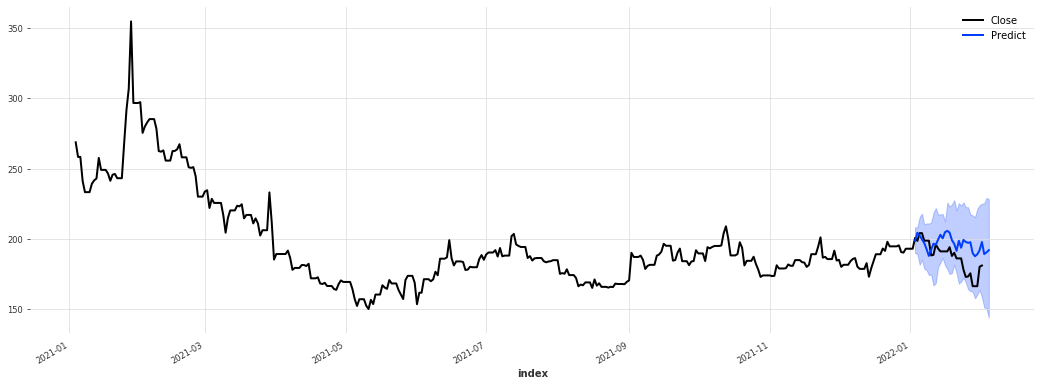

In [29]:
plt.figure(figsize=(18,6))

series.plot()
prediction.plot(label="Predict")
plt.legend()